<a href="https://colab.research.google.com/github/newmantic/MPT/blob/main/MPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

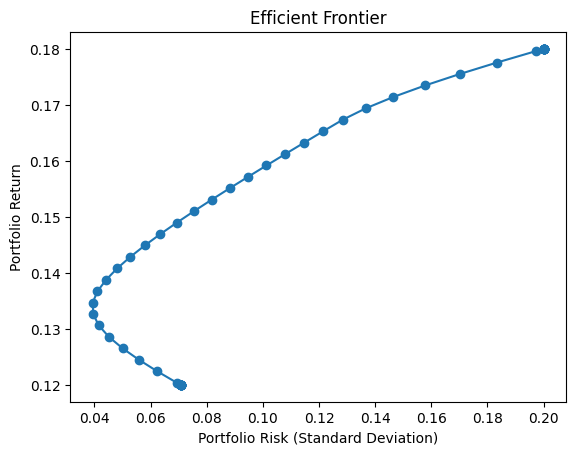

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def portfolio_return(weights, returns):
    """
    Calculate the expected return of the portfolio.

    :param weights: Array of portfolio weights
    :param returns: Array of expected returns for each asset
    :return: Expected portfolio return
    """
    return np.dot(weights, returns)

def portfolio_variance(weights, cov_matrix):
    """
    Calculate the variance of the portfolio.

    :param weights: Array of portfolio weights
    :param cov_matrix: Covariance matrix of asset returns
    :return: Portfolio variance
    """
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def portfolio_statistics(weights, returns, cov_matrix):
    """
    Calculate portfolio return, variance, and Sharpe ratio.

    :param weights: Array of portfolio weights
    :param returns: Array of expected returns for each asset
    :param cov_matrix: Covariance matrix of asset returns
    :return: Tuple of (portfolio return, portfolio variance, Sharpe ratio)
    """
    port_return = portfolio_return(weights, returns)
    port_variance = portfolio_variance(weights, cov_matrix)
    sharpe_ratio = port_return / np.sqrt(port_variance)  # Assuming risk-free rate is 0 for simplicity
    return port_return, port_variance, sharpe_ratio

def minimize_variance(weights, returns, cov_matrix):
    """
    Minimize the portfolio variance for a given level of return.

    :param weights: Array of portfolio weights
    :param returns: Array of expected returns for each asset
    :param cov_matrix: Covariance matrix of asset returns
    :return: Portfolio variance
    """
    return portfolio_variance(weights, cov_matrix)

def optimize_portfolio(returns, cov_matrix, target_return):
    """
    Optimize the portfolio weights to achieve the target return with minimum variance.

    :param returns: Array of expected returns for each asset
    :param cov_matrix: Covariance matrix of asset returns
    :param target_return: Desired portfolio return
    :return: Optimized portfolio weights
    """
    num_assets = len(returns)
    args = (returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda weights: portfolio_return(weights, returns) - target_return},
                   {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    result = minimize(minimize_variance, num_assets * [1. / num_assets], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Testable Example

# Assume we have historical return data for 3 assets
expected_returns = np.array([0.12, 0.18, 0.15])  # Expected returns for 3 assets
cov_matrix = np.array([[0.005, -0.010, 0.004],
                       [-0.010, 0.040, -0.002],
                       [0.004, -0.002, 0.023]])  # Covariance matrix of the assets

# Generate portfolios along the efficient frontier
target_returns = np.linspace(0.10, 0.20, 50)
efficient_portfolios = [optimize_portfolio(expected_returns, cov_matrix, r) for r in target_returns]

# Calculate statistics for the efficient portfolios
efficient_returns = [portfolio_return(p, expected_returns) for p in efficient_portfolios]
efficient_variances = [portfolio_variance(p, cov_matrix) for p in efficient_portfolios]

# Plot the efficient frontier
plt.plot(np.sqrt(efficient_variances), efficient_returns, marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.show()